In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
from  matplotlib.pyplot import figure  

In [3]:
plt.style.use("seaborn")

C:\Users\osama\AppData\Local\Temp\ipykernel_6292\1490283864.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [4]:
data  = pd.read_csv("FreeCodeCamp.csv") 
databar = data
data.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [5]:
data.columns 

Index(['date', 'value'], dtype='object')

In [100]:
date = data['date'].str.split("-" , expand= True)
date


,0,1,2
10,2016,05,19
17,2016,05,26
18,2016,05,27
19,2016,05,28
20,2016,05,29
...,...,...,...
1294,2019,11,24
1299,2019,11,29
1300,2019,11,30
1301,2019,12,01


In [7]:
date.columns = ['Year' , "Day" , "Month"]

In [8]:
date

,Year,Day,Month
0,2016,05,09
1,2016,05,10
2,2016,05,11
3,2016,05,12
4,2016,05,13
...,...,...,...
1299,2019,11,29
1300,2019,11,30
1301,2019,12,01
1302,2019,12,02


In [9]:
data = pd.concat([data, date] , axis = 1)

In [10]:
data

,date,value,Year,Day,Month
0,2016-05-09,1201,2016,05,09
1,2016-05-10,2329,2016,05,10
2,2016-05-11,1716,2016,05,11
3,2016-05-12,10539,2016,05,12
4,2016-05-13,6933,2016,05,13
...,...,...,...,...,...
1299,2019-11-29,171584,2019,11,29
1300,2019-11-30,141161,2019,11,30
1301,2019-12-01,142918,2019,12,01
1302,2019-12-02,220144,2019,12,02


In [11]:
data.value.unique()

array([  1201,   2329,   1716, ..., 142918, 220144, 158549], dtype=int64)

In [12]:
len(data)

1304

In [13]:
data.value.describe()

count    1.304000e+03
mean     6.722068e+04
std      5.933964e+04
min      1.201000e+03
25%      3.575775e+04
50%      5.719750e+04
75%      8.388300e+04
max      1.173655e+06
Name: value, dtype: float64

In [14]:
data = data[
    (data["value"] >= data["value"].quantile(0.025))
    & (data["value"] <= data["value"].quantile(0.975))
]

In [15]:
data

,date,value,Year,Day,Month
10,2016-05-19,19736,2016,05,19
17,2016-05-26,18060,2016,05,26
18,2016-05-27,19997,2016,05,27
19,2016-05-28,19044,2016,05,28
20,2016-05-29,20325,2016,05,29
...,...,...,...,...,...
1294,2019-11-24,138875,2019,11,24
1299,2019-11-29,171584,2019,11,29
1300,2019-11-30,141161,2019,11,30
1301,2019-12-01,142918,2019,12,01


Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

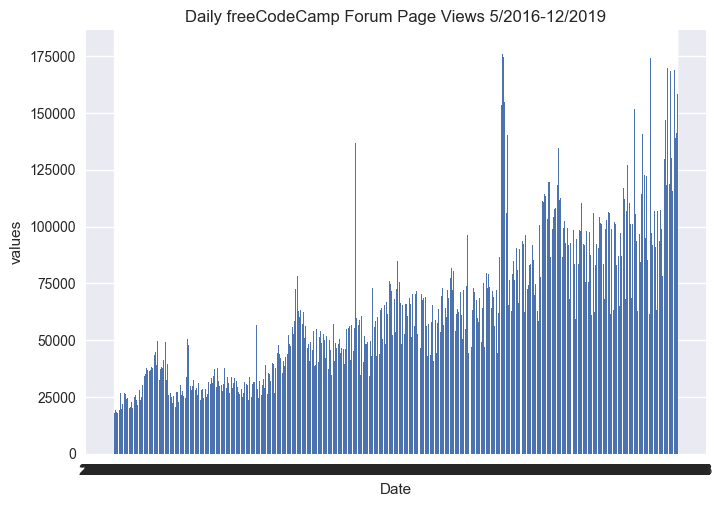

In [16]:
plt.bar(data['date'] , data['value'])
plt.xlabel("Date")  # here we will make group by # FIRST
plt.ylabel("values") 
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

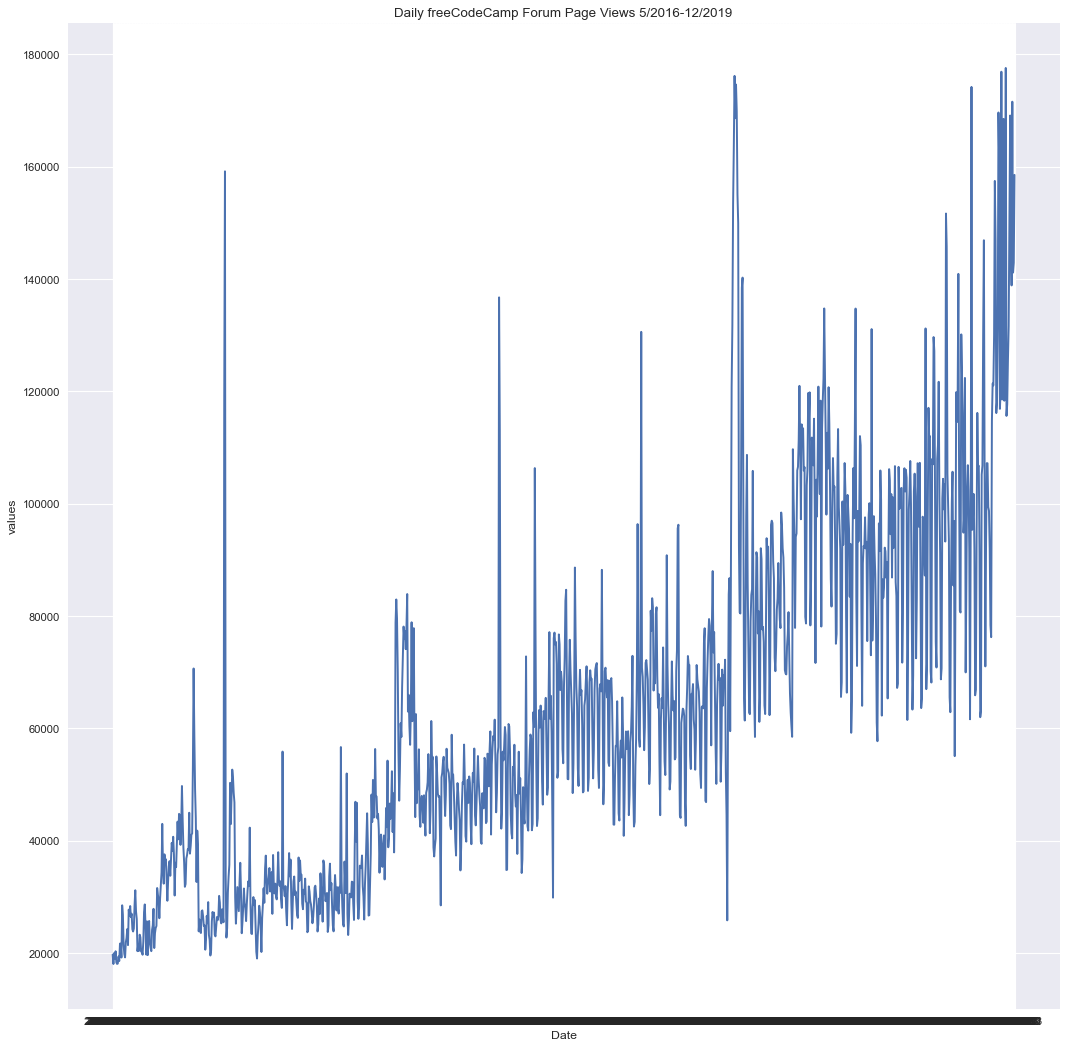

In [17]:
figure(figsize= (16,16)  , dpi  = 80)
plt.plot(data['date'] , data['value'])
plt.xlabel("Date") 
plt.ylabel("values") 
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")


In [18]:
def draw_line_plot():
    # Draw line plot
    fig, ax = plt.subplots(figsize=(16, 6))

    ax = sns.lineplot(data=data, x="date", y="value")

    ax.set(
        xlabel="Date",
        ylabel="Page Views",
    )

    ax.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

    return fig

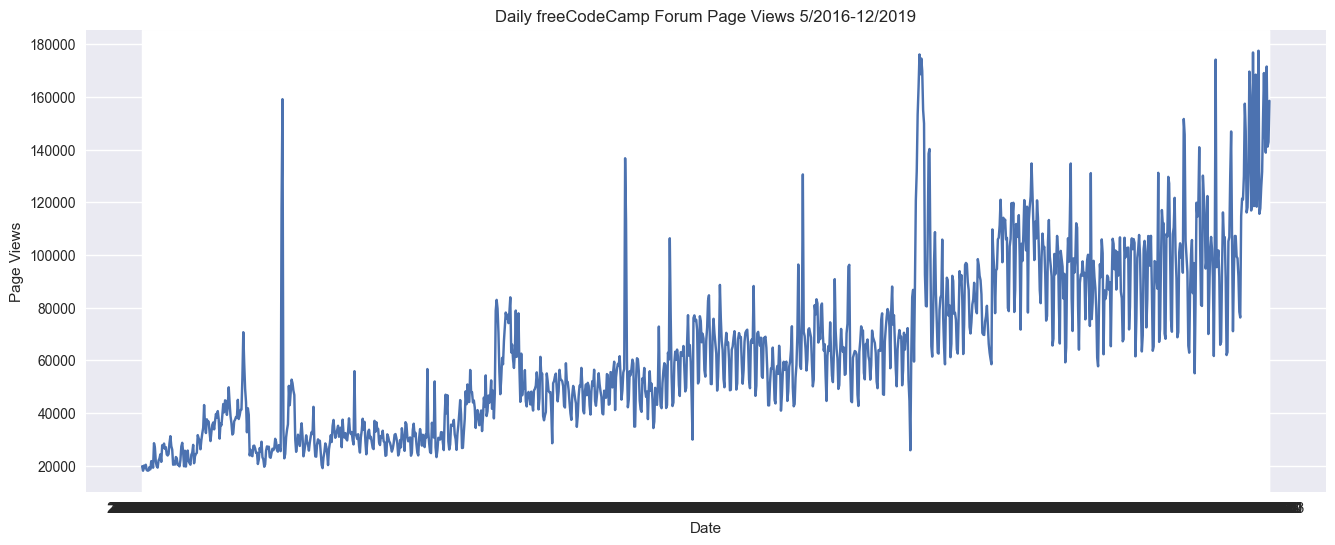

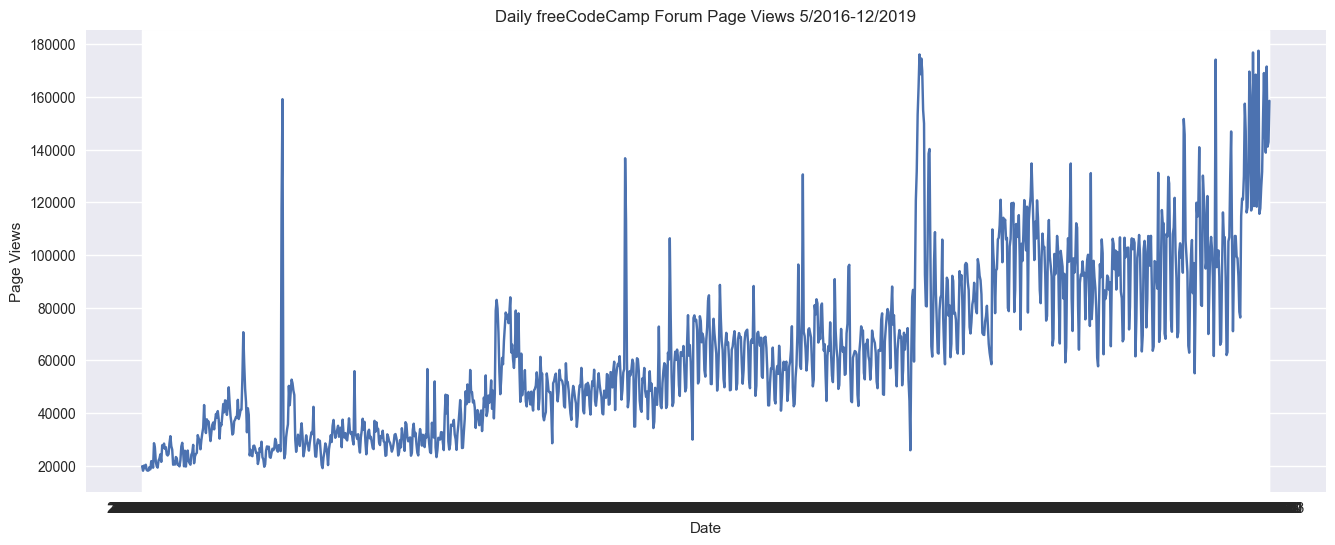

In [19]:
draw_line_plot()

In [20]:
data.columns

Index(['date', 'value', 'Year', 'Day', 'Month'], dtype='object')

In [21]:
data_group_by_Year_Month = data 

In [22]:
data_group_by_Year_Month = data_group_by_Year_Month.groupby(['Year' , 'Month'] , as_index = False ) 

In [23]:
data_group_by_Year_Month.first()
    

,Year,Month,date,value,Day
0,2016,01,2016-07-01,28372,07
1,2016,02,2016-07-02,26393,07
2,2016,03,2016-07-03,27011,07
3,2016,04,2016-07-04,24236,07
4,2016,05,2016-07-05,23843,07
...,...,...,...,...,...
119,2019,27,2019-01-27,86596,01
120,2019,28,2019-01-28,111784,01
121,2019,29,2019-01-29,107881,01
122,2019,30,2019-01-30,106844,01


In [24]:
print(data_group_by_Year_Month)

In [25]:
data_group_by_Year_Month.dtypes

,date,value,Year,Day,Month
0,object,int64,object,object,object
1,object,int64,object,object,object
2,object,int64,object,object,object
3,object,int64,object,object,object
4,object,int64,object,object,object
...,...,...,...,...,...
119,object,int64,object,object,object
120,object,int64,object,object,object
121,object,int64,object,object,object
122,object,int64,object,object,object


In [26]:
print(data_group_by_Year_Month.dtypes)

       date  value    Year     Day   Month
0    object  int64  object  object  object
1    object  int64  object  object  object
2    object  int64  object  object  object
3    object  int64  object  object  object
4    object  int64  object  object  object
..      ...    ...     ...     ...     ...
119  object  int64  object  object  object
120  object  int64  object  object  object
121  object  int64  object  object  object
122  object  int64  object  object  object
123  object  int64  object  object  object

[124 rows x 5 columns]


In [27]:
databar.head()

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933


In [28]:
print(type(databar))

<class 'pandas.core.frame.DataFrame'>


In [29]:
databar 

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


In [36]:
databar.drop(['Year' , 'Month' , 'Day'] , axis = 1 , inplace  = True)

In [39]:
databar['date'] = pd.to_datetime(databar['date'] , format = '%Y-%m-%d' )

In [41]:
databar.dtypes

date     datetime64[ns]
value             int64
dtype: object

In [42]:
databar['Year'] = databar['date'].dt.year
databar['Month']  = databar['date'].dt.month
databar['day'] = databar['date'].dt.day


In [44]:
databar.dtypes

date     datetime64[ns]
value             int64
Year              int64
Month             int64
day               int64
dtype: object

In [61]:
def draw_bar_plot(): 
    sns.barplot(x = 'Year' , y = 'value' , data = databar ) 

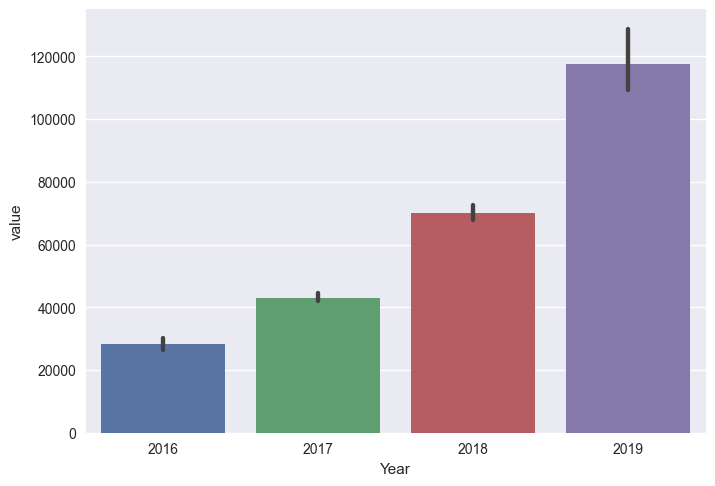

In [62]:
draw_bar_plot()

In [83]:
def draw_box_plot():
    sns.boxplot(x = 'Year', y = 'value', data =databar, palette = 'tab10').set(
    title = 'Year-wise Box Plot (Trend)',  xlabel='Year',  ylabel='Page Views') 


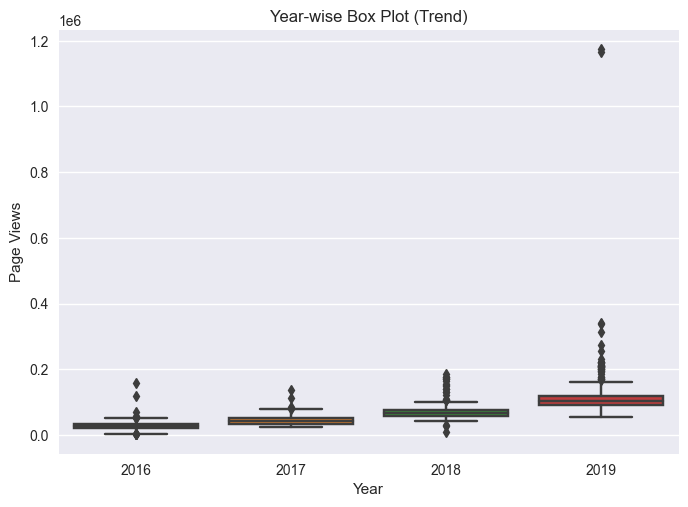

In [84]:
draw_box_plot()

<AxesSubplot: xlabel='Year', ylabel='value'>

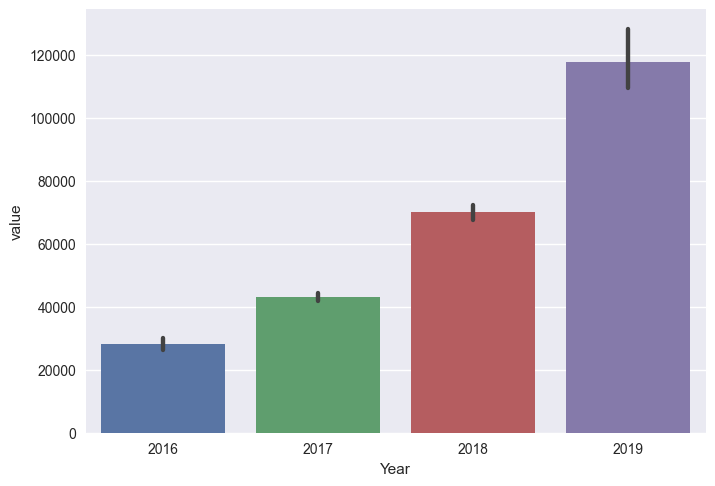

In [58]:
sns.barplot(x = 'Year' , y = 'value' , data = databar ) 

In [85]:
databar2 = databar 

In [86]:
databar2.head()

,date,value,Year,Month,day,NameMonth
0,2016-05-09,1201,2016,5,9,5
1,2016-05-10,2329,2016,5,10,5
2,2016-05-11,1716,2016,5,11,5
3,2016-05-12,10539,2016,5,12,5
4,2016-05-13,6933,2016,5,13,5


In [88]:
array = np.arange(1,13).tolist()

In [89]:
array

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [93]:
databar2['NameMonth'] = databar2['Month'].replace(np.arange(1,13).tolist() , ['January', 'February', 'March', 'April', 'May', 'June', 'July',  'August', 'September', 'October', 'November', 'December']  ) 

In [94]:
databar2['NameMonth'].unique()

array(['May', 'June', 'July', 'August', 'September', 'October',
       'November', 'December', 'January', 'February', 'March', 'April'],
      dtype=object)

In [98]:
def draw_box_plot_Month():
    sns.boxplot(x = 'value', y = 'NameMonth', data =databar, palette = 'tab10').set(
    title = 'Month-wise Box Plot (Trend)',  xlabel='Year',  ylabel='Page Views') 


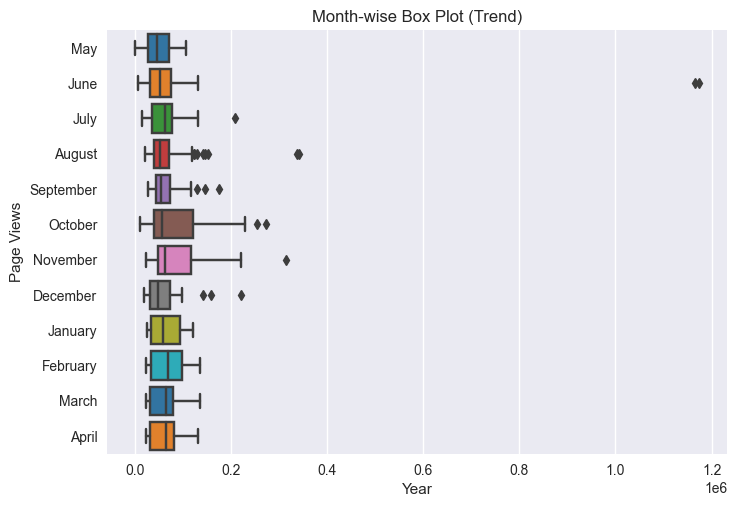

In [99]:
draw_box_plot_Month()